In [ ]:
SETUP DATA

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# URL raw file CSV
url = "https://raw.githubusercontent.com/ZakyAlFatih/gdgoc_ML/main/diabetes.csv"

# Membaca CSV
df = pd.read_csv(url)

# Menampilkan beberapa baris data
print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
VISUALISASI

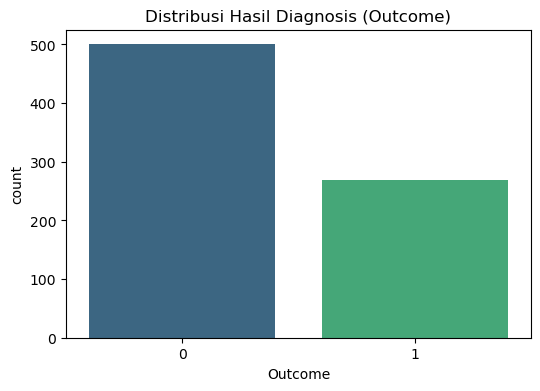

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Outcome', hue='Outcome', palette='viridis')
plt.legend([], [], frameon=False)  # Hilangkan legend agar sesuai dengan gaya awal
plt.title('Distribusi Hasil Diagnosis (Outcome)')
plt.show()



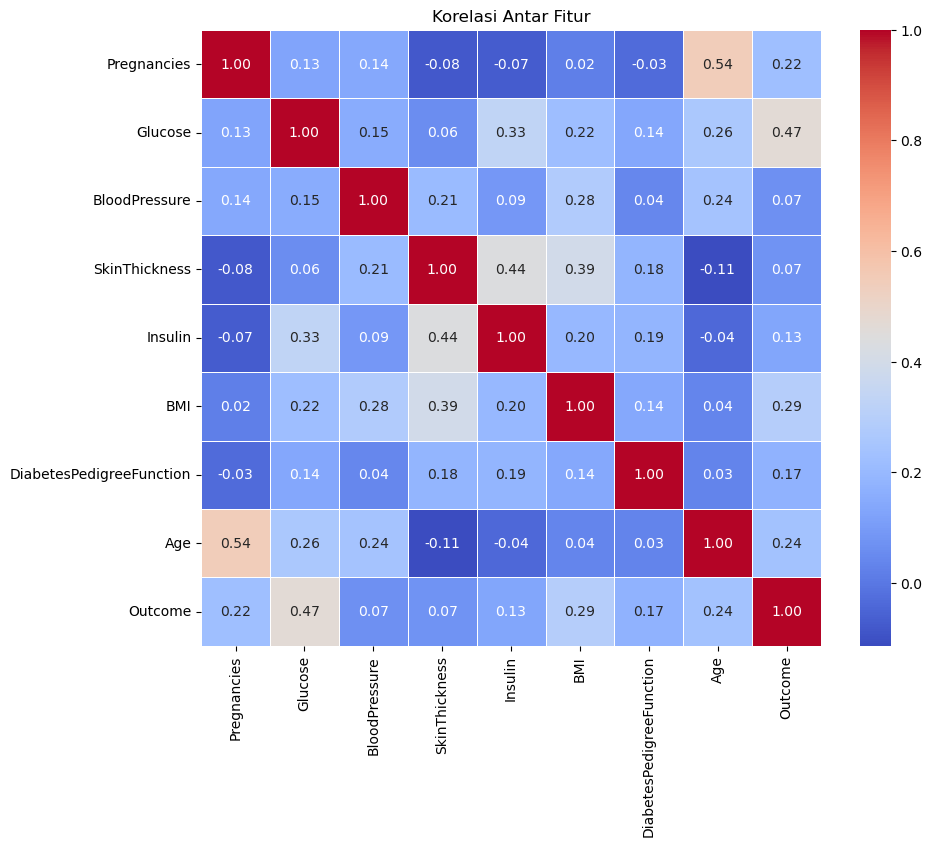

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasi Antar Fitur')
plt.show()


In [ ]:
Korelasi 0.47 menunjukkan hubungan positif yang cukup kuat. Artinya:

Semakin tinggi kadar glukosa dalam darah, semakin besar kemungkinan seseorang terdiagnosis dengan diabetes (Outcome = 1).
Namun, korelasi ini tidak mendekati 1, sehingga masih ada faktor lain yang mempengaruhi diagnosis diabetes.

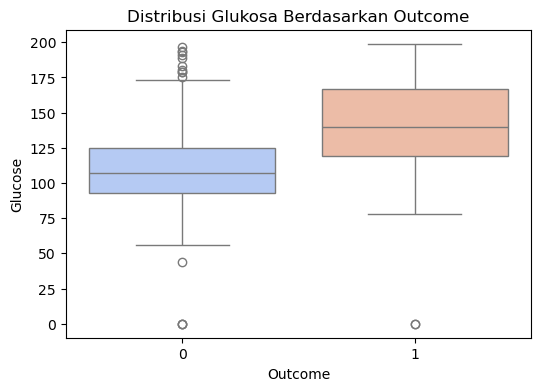

In [32]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Outcome', y='Glucose', hue='Outcome', palette='coolwarm', dodge=False)
plt.legend([], [], frameon=False)  # Menghapus legend jika tidak diperlukan
plt.title('Distribusi Glukosa Berdasarkan Outcome')
plt.show()



In [ ]:
Insight dari Visualisasi Boxplot
Median Kadar Glukosa:

Pasien dengan Outcome 1 (diabetes) memiliki kadar glukosa median yang lebih tinggi dibandingkan pasien dengan Outcome 0 (non-diabetes).
Sebaran Data:

Rentang interkuartil (IQR) untuk Outcome 1 tampak lebih tinggi, menunjukkan variasi yang lebih besar dalam kadar glukosa pada pasien dengan diabetes.
Outliers:

Ada beberapa outlier kadar glukosa yang sangat rendah (<50 mg/dL), yang mungkin merupakan kesalahan pengukuran atau kasus unik.
Potensi Faktor Risiko:

Kadar glukosa yang lebih tinggi tampaknya merupakan indikator signifikan untuk prediksi diabetes.

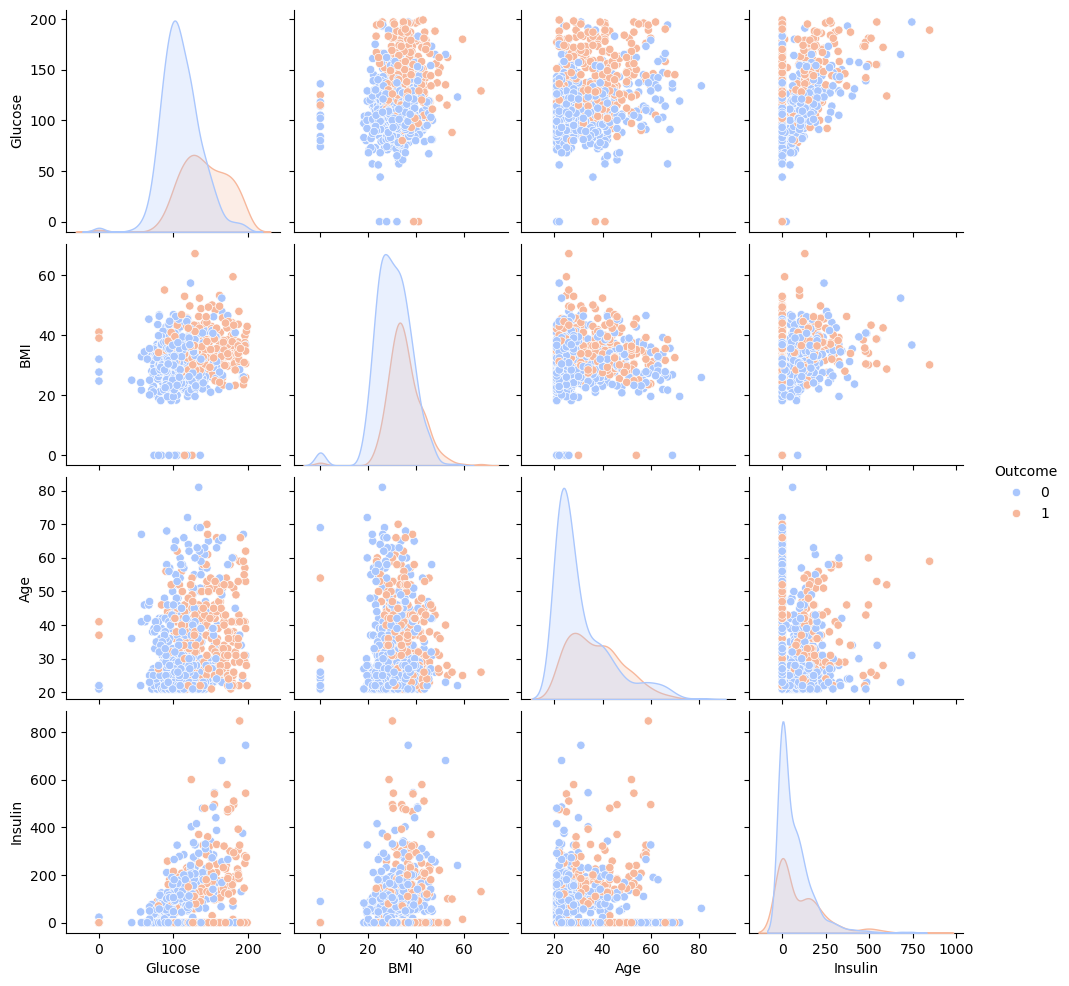

In [34]:
sns.pairplot(df, hue='Outcome', vars=['Glucose', 'BMI', 'Age', 'Insulin'], palette='coolwarm')
plt.show()


In [ ]:
1. Distribusi Variabel
Pada diagonal utama (density plot), terlihat distribusi masing-masing variabel.
Glukosa: Distribusi nilai glukosa pada individu dengan Outcome 1 (merah) lebih bergeser ke kanan dibandingkan dengan Outcome 0 (biru), menunjukkan bahwa individu dengan Outcome 1 (kemungkinan diabetes) cenderung memiliki kadar glukosa lebih tinggi.
BMI: Distribusi BMI juga menunjukkan pola serupa, di mana individu dengan Outcome 1 cenderung memiliki BMI yang lebih tinggi dibandingkan Outcome 0.
Usia (Age): Seiring bertambahnya usia, ada kecenderungan lebih banyak individu dengan Outcome 1, mengindikasikan bahwa usia mungkin menjadi faktor risiko.
Insulin: Distribusinya sangat miring (skewed) dengan beberapa outlier besar.
2. Hubungan Antar Variabel
Glukosa vs Outcome: Semakin tinggi kadar glukosa, semakin besar kemungkinan seseorang memiliki Outcome 1.
BMI vs Outcome: Tidak ada pola yang sangat jelas, tetapi ada kecenderungan individu dengan Outcome 1 memiliki BMI lebih tinggi.
Usia vs Outcome: Individu dengan Outcome 1 lebih banyak berada pada kelompok usia yang lebih tua.
Insulin vs Glukosa: Ada hubungan positif, tetapi tampak beberapa individu dengan kadar insulin tinggi yang merupakan outlier.
3. Korelasi Potensial
Glukosa dan BMI tampaknya memiliki peran dalam membedakan individu dengan Outcome 0 dan 1, sehingga keduanya mungkin variabel prediktor yang kuat.
Usia juga bisa menjadi faktor risiko, terutama karena pada usia yang lebih tua, lebih banyak individu dengan Outcome 1.
Insulin memiliki distribusi yang tidak merata dan kemungkinan terdapat banyak nilai nol atau outlier, sehingga perlu dicek lebih lanjut apakah ada missing values atau pencilan yang perlu ditangani.

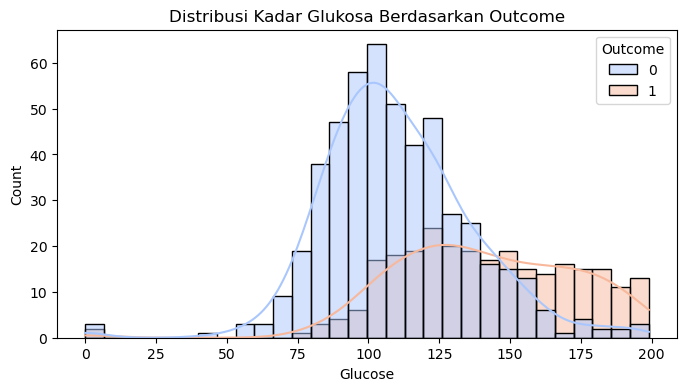

In [22]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Glucose', hue='Outcome', kde=True, palette='coolwarm', bins=30)
plt.title('Distribusi Kadar Glukosa Berdasarkan Outcome')
plt.show()


In [ ]:
1. Perbedaan Distribusi Glukosa Berdasarkan Outcome
Outcome 0 (Biru, Non-Diabetes):

Distribusi kadar glukosa berbentuk lonceng (mendekati distribusi normal).
Puncak distribusi terjadi sekitar 95-105 mg/dL, yang kemungkinan merupakan kadar glukosa normal bagi individu tanpa diabetes.
Sebagian besar individu dengan Outcome 0 memiliki kadar glukosa di bawah 125 mg/dL.
Outcome 1 (Oranye, Diabetes):

Distribusi lebih menyebar ke kanan dibandingkan Outcome 0, menunjukkan bahwa individu dengan diabetes cenderung memiliki kadar glukosa yang lebih tinggi.
Sebagian besar individu dengan Outcome 1 memiliki kadar glukosa di atas 125 mg/dL, yang sesuai dengan batas diagnosis diabetes berdasarkan tes glukosa puasa.
Terdapat lebih banyak individu dengan kadar glukosa di atas 150 mg/dL dibandingkan dengan Outcome 0.
2. Overlapping Distribusi
Rentang 100-140 mg/dL menunjukkan area di mana individu dengan diabetes dan non-diabetes saling tumpang tindih.
Ini berarti bahwa meskipun kadar glukosa tinggi sering dikaitkan dengan diabetes, tidak semua individu dalam rentang ini memiliki kondisi tersebut.
Bisa jadi ada faktor lain (misalnya, BMI, insulin, usia) yang juga mempengaruhi diagnosis diabetes.

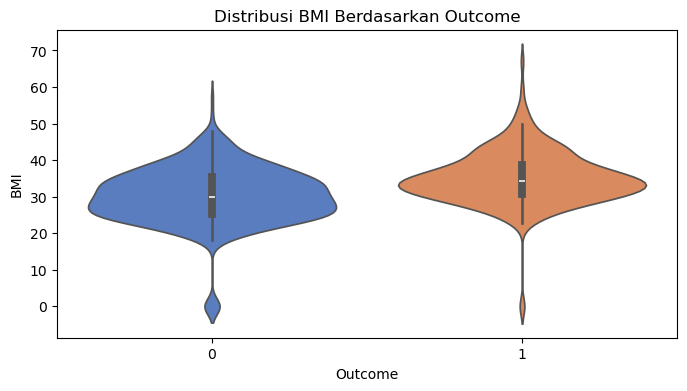

In [26]:
plt.figure(figsize=(8, 4))
sns.violinplot(data=df, x='Outcome', y='BMI', hue='Outcome', palette='muted', dodge=False)
plt.legend([], [], frameon=False)  # Hilangkan legend jika tidak diperlukan
plt.title('Distribusi BMI Berdasarkan Outcome')
plt.show()



In [ ]:
1. Perbedaan Distribusi BMI Berdasarkan Outcome
Outcome 0 (Biru, Non-Diabetes)

Distribusi BMI berkisar antara ~15 hingga ~50, dengan mayoritas individu berada dalam rentang 20-35.
Median BMI berada di sekitar 30, yang berarti sebagian besar individu non-diabetes memiliki BMI dalam kategori overweight atau obesitas ringan.
Ada beberapa individu dengan BMI sangat rendah (~0-10), yang kemungkinan adalah data error atau outlier.
Outcome 1 (Oranye, Diabetes)

Distribusi BMI mirip dengan Outcome 0 tetapi sedikit lebih condong ke kanan (BMI lebih tinggi).
Median BMI juga berada di sekitar 30-35, menunjukkan bahwa individu dengan diabetes cenderung memiliki BMI lebih tinggi dibandingkan individu tanpa diabetes.
Ada ekor distribusi yang lebih panjang ke atas (~60-70), menunjukkan bahwa beberapa individu dengan diabetes memiliki BMI yang sangat tinggi (obesitas parah).
2. Perbandingan antara Outcome 0 dan 1
Individu dengan diabetes (Outcome 1) memiliki kecenderungan BMI lebih tinggi dibandingkan individu tanpa diabetes (Outcome 0).
Distribusi BMI pada kedua kelompok cukup mirip, tetapi Outcome 1 memiliki lebih banyak individu dengan BMI tinggi (>40).
Terdapat outlier di kedua kelompok, terutama pada BMI rendah (~0-10) dan tinggi (~60-70).